In [1]:
import numpy as np
import random
import math

In [2]:
LEADER = "leader"
VALIDATOR = "validator"
NUMBER_OF_DEPOSIT = "deposit"
NODE = "node"
SPEED = "speed"
RANKING = "ranking"
TRUST = "trust"
NUMBER_OF_EPOCH = "epoch"
LEADER_TEST = "leader_test"
VALIDATOR_TEST = "validator_test"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NODE] = i+1
        nodes[i][SPEED] = 0
        nodes[i][RANKING] = 0
        nodes[i][TRUST] = 0
        nodes[i][LEADER] = 0
        nodes[i][VALIDATOR] = 0
        nodes[i][NUMBER_OF_DEPOSIT] = 0
        nodes[i][NUMBER_OF_EPOCH] = 0
        nodes[i][LEADER_TEST] = 0
        nodes[i][VALIDATOR_TEST] = 0
        
    return nodes

In [3]:
#random speed of nodes
def random_nodes_speed(nodes):
    arr_speed = np.random.randint(low=5,high=10,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][SPEED] = arr_speed[i]
    return arr_speed

In [4]:
#random number of epochs that masternode join in blockchain
def random_epochs_of_nodes(nodes, total_epoch):
    arr_epochs = np.random.randint(low=total_epoch/2,high=total_epoch,size=len(nodes)).tolist()
    for i in range(len(nodes)):
        nodes[i][NUMBER_OF_EPOCH] = arr_epochs[i]
    return arr_epochs

In [5]:
def random_leader(nodes):
    maximum = -1
    index_of_leader = -1
    arr_deposit = np.random.randint(low=50000,high=100000,size=len(nodes)).tolist()
    for i in range(len(arr_deposit)):
        if arr_deposit[i] > maximum:
            maximum = arr_deposit[i]
            index_of_leader = i
    nodes[index_of_leader][LEADER] += 1

In [6]:
def random_validator(nodes):
    maximum = -1
    index_of_validator = -1
    arr_validator = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_validator)):
        if arr_validator[i] > maximum:
            maximum = arr_validator[i]
            index_of_validator = i
    nodes[index_of_validator][VALIDATOR] += 1

In [543]:
def deposit_votes(nodes):
    deposit_vote_max = -1
    arr_deposit_vote = np.random.randint(low=50000,high=1000000,size=len(nodes)).tolist()
#     arr_deposit_vote = np.sort(arr_deposit_vote)[::-1]
    for i in range(len(arr_deposit_vote)):
        nodes[i][NUMBER_OF_DEPOSIT] = arr_deposit_vote[i]
        if arr_deposit_vote[i] > deposit_vote_max:
            deposit_vote_max = arr_deposit_vote[i]
    return arr_deposit_vote, deposit_vote_max

In [8]:
# chose a leader node by voting
def vote_leader_test01(nodes):
    
    #random array with length is number of canidate of leader
    arr_random = np.random.rand(len(nodes)).tolist()
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    arr_leader = []
    for i in range(len(nodes)):
        multi = nodes[i][NUMBER_OF_DEPOSIT] * arr_random[i]
        arr_leader.append(multi)
        if multi > maximum:
            index_of_leader = i
            maximum = arr_leader[i]
    nodes[index_of_leader][LEADER_TEST] += 1
    return index_of_leader

# chose a leader node by voting
def vote_leader_test02(nodes, arr_deposit_vote):
    index_of_leader = -1
    total_deposit = sum(arr_deposit_vote)
    randomInt = np.random.randint(low=1, high=total_deposit,size=1).tolist()[0]
    sub_total = total_deposit - randomInt
    for i in range(len(nodes)):
        if(sub_total) < arr_deposit_vote[i]:
            index_of_leader = i
            break
        else:
            sub_total = sub_total - arr_deposit_vote[i]
        
    nodes[index_of_leader][LEADER_TEST] += 1
    return index_of_leader

In [9]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [10]:
# Trust for each masternode
def trust(nodes, arr_speed, total_epoch):
    trust_max = 0
    speed_arg = sum(arr_speed)/len(nodes)
    a,b,c,d = 0.25, 0.1, 0.3, 0.35
    for i in range(len(arr_deposit_vote)):
        trust = a*(nodes[i][NUMBER_OF_EPOCH]/total_epoch) + b*(
                nodes[i][SPEED]/speed_arg) + c*(
                nodes[i][LEADER]/nodes[i][NUMBER_OF_EPOCH]) + d*(
                nodes[i][VALIDATOR]/nodes[i][NUMBER_OF_EPOCH])
        nodes[i][TRUST] = trust
        if trust > trust_max:
            trust_max = trust
    return trust_max      

In [517]:
# Ranking for each masternode
def ranking(nodes, arr_deposit_vote, trust_max, deposit_max):
    total_deposit = sum(arr_deposit_vote)

    a = 0.25
    for i in range(len(nodes)):
        vote_deposit_avg = arr_deposit_vote[i] / deposit_max
        trust_avg = nodes[i][TRUST] / trust_max
        nodes[i][RANKING] = a * vote_deposit_avg + (1-a) * math.sqrt(trust_avg)
        print(vote_deposit_avg, ":", trust_avg)
        

In [335]:
# Random validator base on Ranking of each node
def choose_validator_test(nodes, leader):
    index_of_validator = -1
    maximum = -1
    
    arr_random = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_random)):
        if nodes[i][RANKING] == 0:
            point = arr_random[i]
        else:
            point = math.sqrt(nodes[i][RANKING]) * math.pow(arr_random[i],4)
            
        if point > maximum:
            maximum = point
            if i != leader:
                index_of_validator = i
                
    nodes[index_of_validator][VALIDATOR_TEST] += 1
#     print(index_of_validator+1, ':', nodes[index_of_validator][RANKING], '*', arr_random[index_of_validator])
    return index_of_validator

In [544]:
# Init nodes and data nodes
nodes = init_nodes(150)
total_epoch = 5000  # Total epoch in blockchain
arr_speed = random_nodes_speed(nodes)
random_epochs_of_nodes(nodes, total_epoch)
for i in range(total_epoch):
    random_leader(nodes)
    random_validator(nodes)

In [545]:
arr_deposit_vote, deposit_max = deposit_votes(nodes)
trust_max = trust(nodes, arr_speed, total_epoch)
ranking(nodes, arr_deposit_vote, trust_max, deposit_max)
# mean_deposit = []
# for i in range(len(arr_deposit_vote)):
#     mean_deposit.append(arr_deposit_vote[i]*arr_deposit_vote[i])

0.8325297315936776 : 0.7126897379665564
0.9984723213498103 : 0.755167915805225
0.1571724713109167 : 0.6810869210835552
0.5287522353828018 : 0.7231876085494007
0.6317993728899189 : 0.8034062626834041
0.7989388447381294 : 0.7318198430874016
0.38269051876919624 : 0.9380963451131259
0.5540762155269889 : 0.8473432559288199
0.6822468504158012 : 0.7148792853798257
0.17754452722154948 : 0.8219170921258323
0.30098577374317353 : 0.934279709586022
0.8409580269288447 : 0.7825609127475956
0.9514510942349177 : 0.9347376936385328
0.3016052654792741 : 0.7113830860015633
0.24572771233129376 : 0.8479180091789806
0.1507419867039832 : 0.7789664557741276
0.6092460645233723 : 0.5517305256539086
0.6894331550373299 : 0.7438826515217762
0.21024827785307018 : 0.6728567099239664
0.5974256008468392 : 0.8917426619573836
0.9855682483420075 : 0.6314417666895675
0.15289416915933568 : 0.702661622771362
0.9482564014146063 : 0.8950054276775269
0.48507706557390196 : 0.7165837538342424
0.4467958844898516 : 0.8090758159719

In [546]:
for i in range(len(nodes)):
    nodes[i][LEADER_TEST] = 0
    nodes[i][VALIDATOR_TEST] = 0
for i in range(100000):
    leader_test = vote_leader_test01(nodes)
    validator_test = choose_validator_test(nodes, leader_test)

In [547]:
nodes.sort(key=lambda x: x[RANKING])

In [548]:
x_array = []
leader_y_array = []
leader_test_y_array = []
validator_y_array = []
validator_test_y_array = []
deposit_y_array = []
epoch_y_array = []
ranking_y_array = []
trust_y_array = []
speed_y_array = []

for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][LEADER])
    leader_test_y_array.append(nodes[i][LEADER_TEST])
    deposit_y_array.append(nodes[i][NUMBER_OF_DEPOSIT])
    validator_y_array.append(nodes[i][VALIDATOR])
    validator_test_y_array.append(nodes[i][VALIDATOR_TEST])
    epoch_y_array.append(nodes[i][NUMBER_OF_EPOCH])
    ranking_y_array.append(nodes[i][RANKING])
    trust_y_array.append(nodes[i][TRUST])
    speed_y_array.append(nodes[i][SPEED])

In [171]:
ranking_y_array_old = ranking_y_array

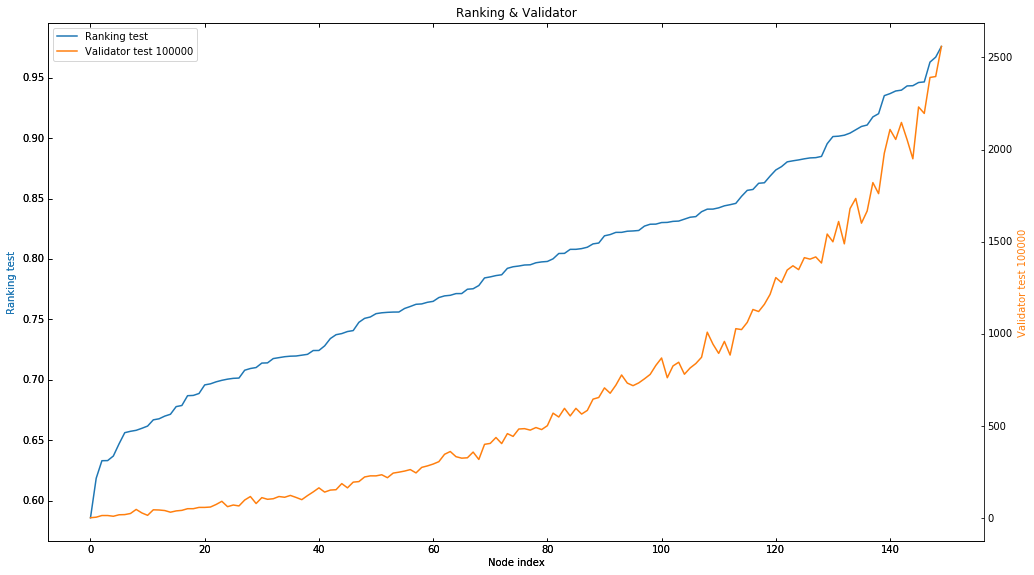

In [549]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Ranking test")
par1.set_ylabel("Validator test 100000")

p1, = host.plot(x_array, ranking_y_array, label="Ranking test")
p2, = par1.plot(x_array, validator_test_y_array, label="Validator test 100000")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.title("Ranking & Validator")
plt.show()

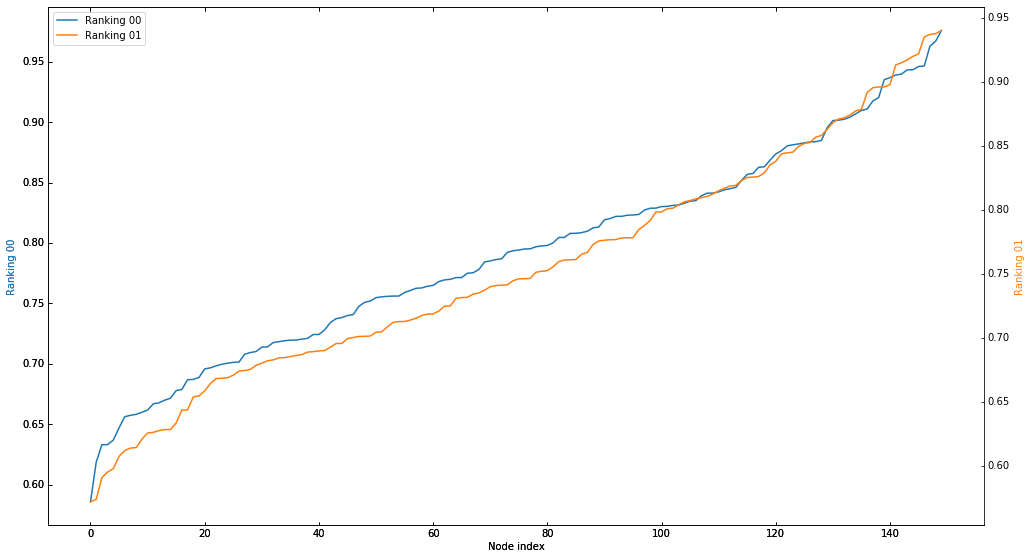

In [550]:
fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Ranking 00")
par1.set_ylabel("Ranking 01")

p1, = host.plot(x_array, ranking_y_array, label="Ranking 00")
p2, = par1.plot(x_array, ranking_y_array_old, label="Ranking 01")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.show()

In [551]:
nodes_validator_none = []
for i in range(len(nodes)):
    if nodes[i][VALIDATOR_TEST] == 0:
        nodes_validator_none.append(nodes[i])
# node_none
len(nodes_validator_none)

0

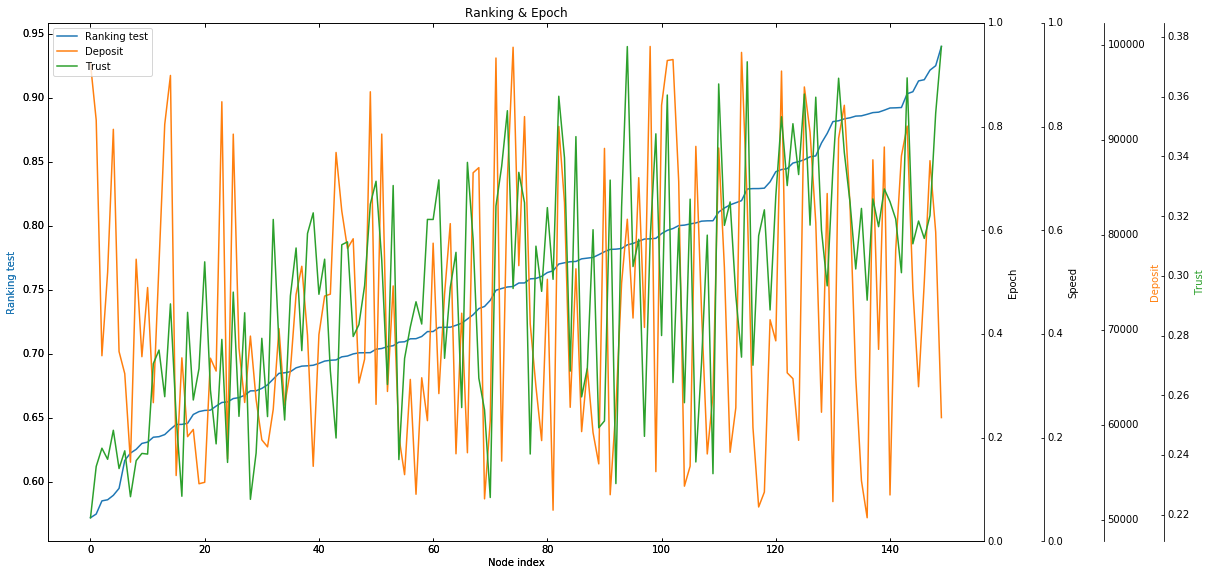

In [44]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
par3 = ParasiteAxes(host, sharex=host)
par4 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)
host.parasites.append(par3)
host.parasites.append(par4)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Speed")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

par3.set_ylabel("Deposit")
offset = (120, 0)
new_axisline = par3.get_grid_helper().new_fixed_axis
par3.axis["right3"] = new_axisline(loc="right", axes=par3, offset=offset)

par4.set_ylabel("Trust")
offset = (180, 0)
new_axisline = par3.get_grid_helper().new_fixed_axis
par4.axis["right4"] = new_axisline(loc="right", axes=par4, offset=offset)


fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Ranking test")
par1.set_ylabel("Epoch")
deposit_y_array
p1, = host.plot(x_array, ranking_y_array, label="Ranking test")
# p2, = par1.plot(x_array, epoch_y_array, label="Epoch")
# p3, = par2.plot(x_array, speed_y_array, label="Speed")
p4, = par3.plot(x_array, deposit_y_array, label="Deposit")
p5, = par4.plot(x_array, trust_y_array, label="Trust")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right2"].label.set_color(p3.get_color())
par3.axis["right3"].label.set_color(p4.get_color())
par4.axis["right4"].label.set_color(p5.get_color())

plt.title("Ranking & Epoch")
plt.show()

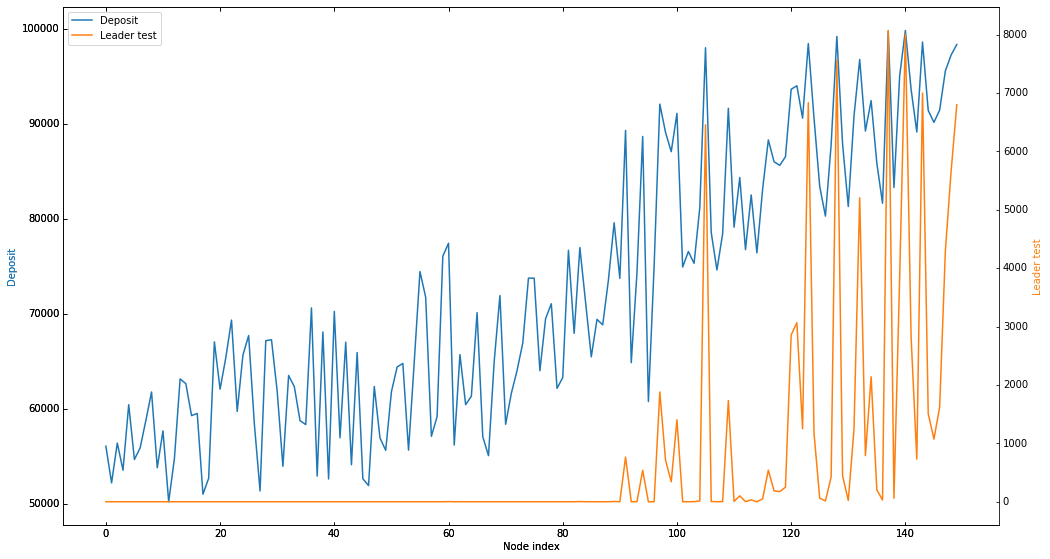

In [22]:
fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)
host.set_xlabel("Node index")
host.set_ylabel("Deposit")
par1.set_ylabel("Leader test")

p1, = host.plot(x_array, deposit_y_array, label="Deposit")
p2, = par1.plot(x_array, leader_test_y_array, label="Leader test")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.show()

In [ ]:
nodes_leader_none = []
for i in range(len(nodes)):
    if nodes[i][LEADER_TEST] == 0:
        nodes_leader_none.append(nodes[i])
# node_none
len(nodes_leader_none)

In [ ]:
max_node = -1
node_max_rank = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] > max_node:
        max_node = nodes[i][RANKING]
        node_max_rank = nodes[i]
node_max_rank

In [ ]:
node_max_validator = -1
max_validator = -1
for i in range(len(nodes)):
    if nodes[i][NUMBER] > max_validator:
        max_validator = nodes[i][VALIDATOR_TEST]
        node_max_validator = nodes[i]
node_max_validator

In [ ]:
node_min_validator = -1
min_validator = 1000
for i in range(len(nodes)):
    if nodes[i][VALIDATOR_TEST] < min_validator:
        min_validator = nodes[i][VALIDATOR_TEST]
        node_min_validator = nodes[i]
node_min_validator

In [ ]:
min_node = 10
node_min_rank = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] < min_node:
        min_node = nodes[i][RANKING]
        node_min_rank = nodes[i]
node_min_rank

In [ ]:
nodes.sort(key=lambda x: x[NODE])

In [ ]:
ranking_y_array

In [ ]:
speed_y_array

In [ ]:
trust_y_array

In [373]:
nodes[len(nodes)-1]

{'deposit': 481440,
 'epoch': 4866,
 'leader': 34,
 'leader_test': 7336,
 'node': 89,
 'ranking': 0.9708488238746404,
 'speed': 8,
 'trust': 0.36059965507788333,
 'validator': 41,
 'validator_test': 3210}

In [279]:
arr_test = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [311]:
for i in range(len(arr_test)):
    print(math.sqrt(arr_test[i]) - arr_test[i])

0.21622776601683794
0.24721359549995792
0.24772255750516609
0.23245553203367586
0.20710678118654757
0.17459666924148343
0.1366600265340756
0.09442719099991581
0.048683298050513746


In [374]:
ranking_y_array

[0.4096389118743544,
 0.41007916965688074,
 0.41313124144991037,
 0.41900912665329204,
 0.42916702312696337,
 0.43027356109641185,
 0.4410855505716635,
 0.44295533930156533,
 0.4457644045967022,
 0.449651585123546,
 0.45900433979576455,
 0.45930066566497835,
 0.4683106214238019,
 0.4773503925294942,
 0.4841490325786363,
 0.4876832288916503,
 0.4889659238301619,
 0.49120848331447553,
 0.49732246931540125,
 0.5044116085345306,
 0.5057237457362888,
 0.5071752458884202,
 0.5120440011689031,
 0.5131491737541247,
 0.5135787479014077,
 0.5220611778278212,
 0.523093383118725,
 0.5274085007969774,
 0.5380690409636026,
 0.5384846665269926,
 0.5391876928389854,
 0.5399819304104896,
 0.5418963465449481,
 0.5498889213341975,
 0.5522081195788241,
 0.5525676258618883,
 0.5526214791278542,
 0.555831819435013,
 0.5558381223743958,
 0.5568263376936733,
 0.5586227974230977,
 0.561107130489982,
 0.5660701516939612,
 0.5733764246210441,
 0.5751428595084223,
 0.5766509066770178,
 0.5766909430917484,
 0.5839

In [386]:
deposit_y_array

[108119,
 94067,
 112523,
 160647,
 79733,
 79839,
 179711,
 213720,
 124095,
 138738,
 102661,
 84538,
 135787,
 204000,
 73684,
 240975,
 188139,
 284644,
 347950,
 135724,
 158988,
 80878,
 270854,
 108127,
 201608,
 203171,
 128557,
 355896,
 238498,
 114833,
 453158,
 160026,
 387458,
 224387,
 213246,
 473755,
 133068,
 340628,
 301447,
 398039,
 408177,
 381883,
 331373,
 260339,
 159570,
 267168,
 314608,
 374178,
 196140,
 359103,
 144755,
 290871,
 578398,
 375071,
 381763,
 553440,
 314497,
 596262,
 608572,
 324549,
 559203,
 543696,
 289915,
 369014,
 449619,
 421502,
 671473,
 502643,
 505200,
 329820,
 484845,
 621559,
 463726,
 565878,
 650489,
 574947,
 550387,
 526614,
 680682,
 385149,
 754278,
 439715,
 520362,
 784734,
 654116,
 584605,
 646941,
 634048,
 589707,
 702958,
 713265,
 829416,
 797994,
 799395,
 509189,
 784896,
 665167,
 641161,
 646884,
 482752,
 862942,
 846264,
 838847,
 767497,
 626571,
 555612,
 686580,
 610723,
 966727,
 765392,
 780554,
 770759